In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
from scipy import stats
from scipy import optimize
import urllib.request
import seaborn as sns
plt.style.use('dark_background')

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

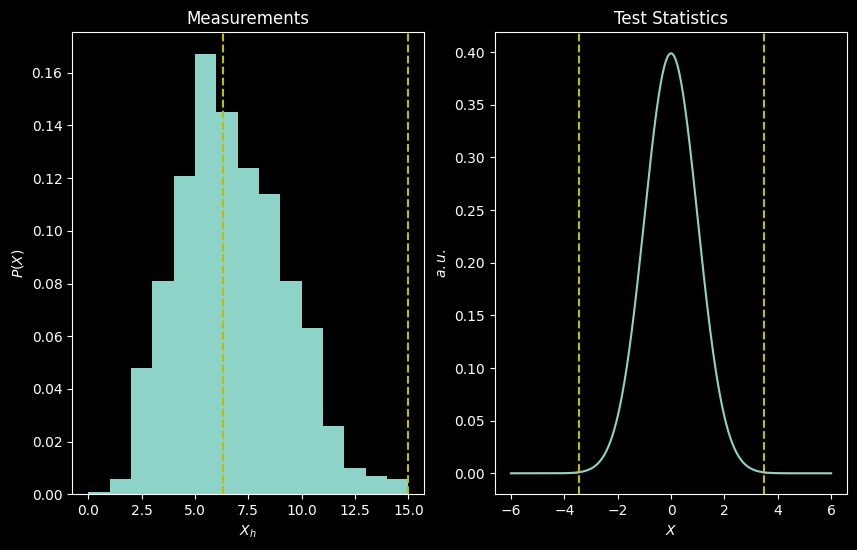

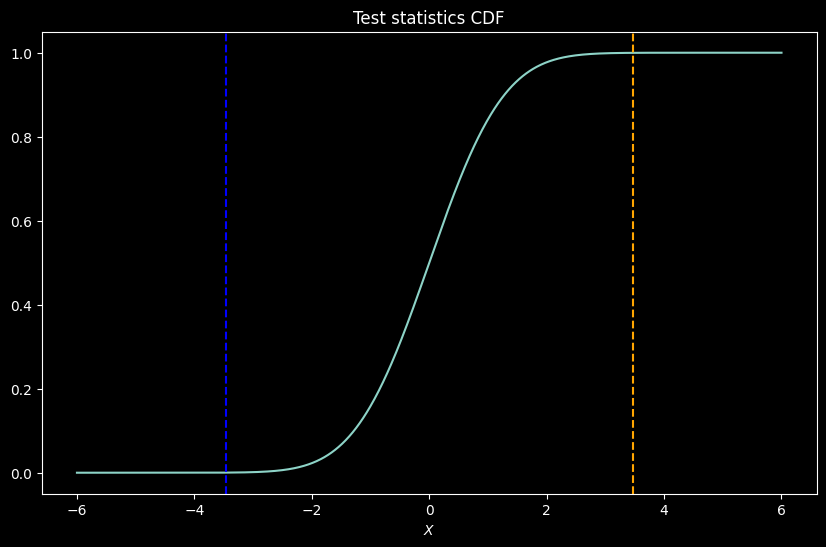

pvalue = 0.0005279431738299246


<Figure size 640x480 with 0 Axes>

In [39]:
x0 =15
mu = 6.3
sigma_mu = np.sqrt(mu)
Z = abs(x0-mu)/sigma_mu

# number of hurricanes follows the poison distribution
x_hurricanes = stats.poisson.rvs(mu, loc=0, size=1000)

#Test Statistics plot
x = np.linspace(-6, 6, 1000)
y = stats.norm.pdf(x)
fig, (ax2, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
ax1.plot(x,y)
ax1.fill_between(x, y, where=np.abs(x) > np.abs(Z), color='r')
ax1.axvline(Z, linestyle='--', color='y')
ax1.axvline(-Z, linestyle='--', color='y')
ax1.set_title('Test Statistics')
ax1.set_ylabel('$a.u.$')
ax1.set_xlabel('$X$')

# Measurements
ax2.hist(x_hurricanes, bins=15, density=True)
ax2.set_title('Measurements')
ax2.set_xlabel('$X_h$')
ax2.set_ylabel('$P(X)$')
ax2.axvline(x0, linestyle='--', color='y')
ax2.axvline(mu, linestyle='--', color='y')
plt.show()

# cumulative distribution
fig = plt.figure(figsize=(10,6))
cs = stats.norm.cdf(x)
plt.plot(x,cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("$X$")
plt.show()
plt.tight_layout()
# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("pvalue =", pvalue)

Since the p_value is very small we will decline the null hypothesis so the difference between the number of hurricanes in 2005 and the historical average is statistically significant.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629
p_value = 0.004302464132864604


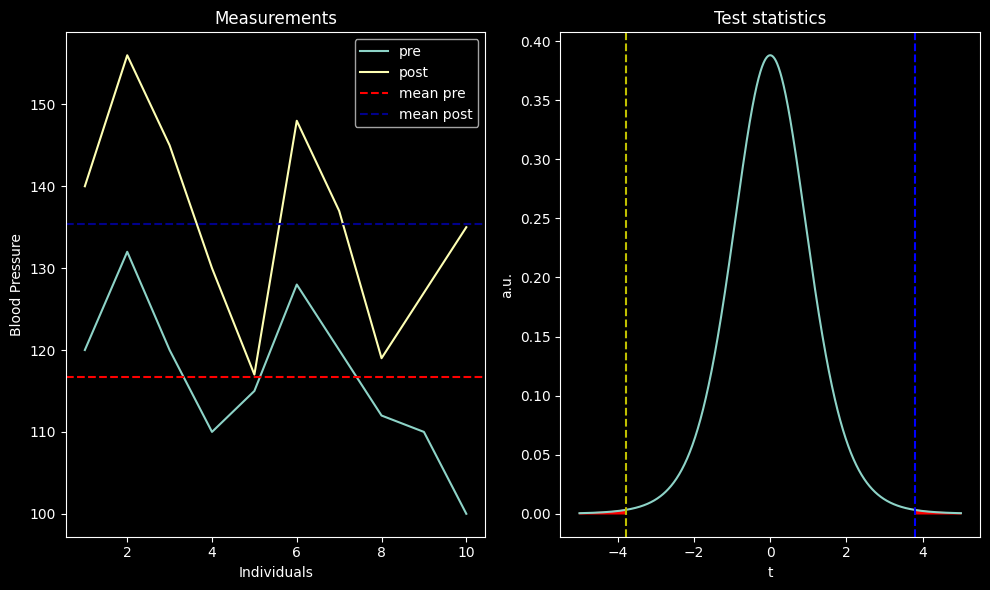

In [61]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = pre.size
sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)
x_1 = np.mean(pre)
x_2 = np.mean(post)
T = (x_1 - x_2)/(sigma * np.sqrt(2/n))
individuals = np.arange(1,11)

print('T =',T)

# plot the measurements
fig , (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
ax1.plot(individuals, pre, label='pre')
ax1.plot(individuals, post, label='post')
ax1.set_title('Measurements')
ax1.set_xlabel('Individuals')
ax1.set_ylabel('Blood Pressure')
ax1.axhline(x_1, linestyle='--', color='r', label='mean pre')
ax1.axhline(x_2, linestyle='--', color='darkblue', label='mean post')
ax1.legend()

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
ax2.plot(xs, ts)
ax2.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='r')
ax2.axvline(T, linestyle='--', color='y')
ax2.axvline(-T, linestyle='--', color='blue')
ax2.set_title("Test statistics")
ax2.set_ylabel("a.u.")
ax2.set_xlabel("t")
plt.tight_layout()
# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p_value =", pvalue)

we can set the level of significance alpha = 0.05 and since p_value < alpha we can reject the null hypothesis and we can conclude that the blood pressure change is statistically significant.

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

max temperature parameters:
 [10.58169957 -0.59227422 18.11889318 27.94963513]
covariance matrix:
 [[ 0.16816478  0.00085892 -0.00522799  0.00655137]
 [ 0.00085892  0.00044872 -0.00296271 -0.00640283]
 [-0.00522799 -0.00296271  0.02135852  0.04203909]
 [ 0.00655137 -0.00640283  0.04203909  0.18339921]]
A = 10.58 +- 0.41
nu = -0.59 +- 0.02
B = 18.12 +- 0.15
C = 27.95 +- 0.43

min temperature parameters:
 [ 25.14962     -5.68186441  47.54705993 -36.71256604]
covariance matrix:
 [[ 1.72807268e+00 -2.48091216e-04 -3.66509611e-03  1.89193011e-01]
 [-2.48091216e-04  5.30713805e-04 -3.55962208e-03  1.60002139e-02]
 [-3.66509611e-03 -3.55962208e-03  2.70519169e-02 -1.04188020e-01]
 [ 1.89193011e-01  1.60002139e-02 -1.04188020e-01  1.41859566e+00]]
A = 25.15 +- 1.31
nu = -5.68 +- 0.02
B = 47.55 +- 0.16
C = -36.71 +- 1.19


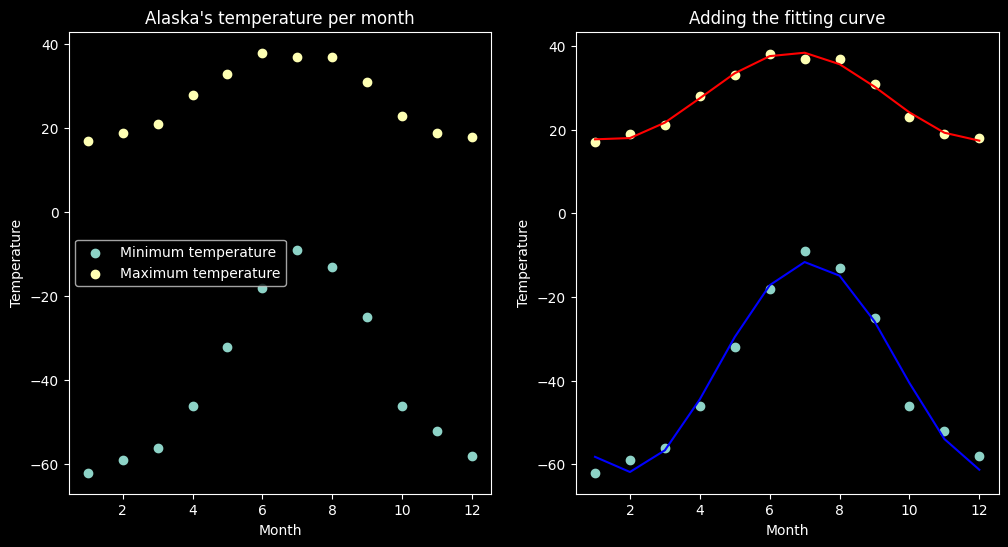

In [92]:
T_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
T_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1,13)

# Plot these temperatures.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.scatter(months, T_min, label='Minimum temperature')
ax1.scatter(months, T_max, label='Maximum temperature')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.set_title("Alaska's temperature per month")
ax1.legend()

def f(t, A, nu, B, C):
    return A * np.sin(nu * t + B) + C

popt_max, pcov_max = optimize.curve_fit(f, months, T_max, [1, -1, 20, 26]) 
popt_min, pcov_min = optimize.curve_fit(f, months, T_min)

# parameters for the max temperatures fitted curve 
print("max temperature parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("A = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("nu = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("B = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("C = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))

# parameters for the min temperatures fitted curve 
print("\nmin temperature parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("A = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("nu = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("B = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("C = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))

ax2.scatter(months, T_min)
ax2.scatter(months, T_max)
days = np.linspace(0, 12, num=365)
ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature')
ax2.set_title('Adding the fitting curve')

ax2.plot(months, f(months, *popt_max), 'r-')
ax2.plot(months, f(months, *popt_min), 'b-')

The max temperature curve wasn't fitting well the data for the first run but after initializing the optimize.curve_fit function with the found result the curve fitted well the data as indicated above. 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [116]:
df = np.load("data/residuals_261.pkl",allow_pickle=True).item()
df = pd.DataFrame(df,columns=['residuals','distances'])
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


Text(0.5, 0, 'Residuals')

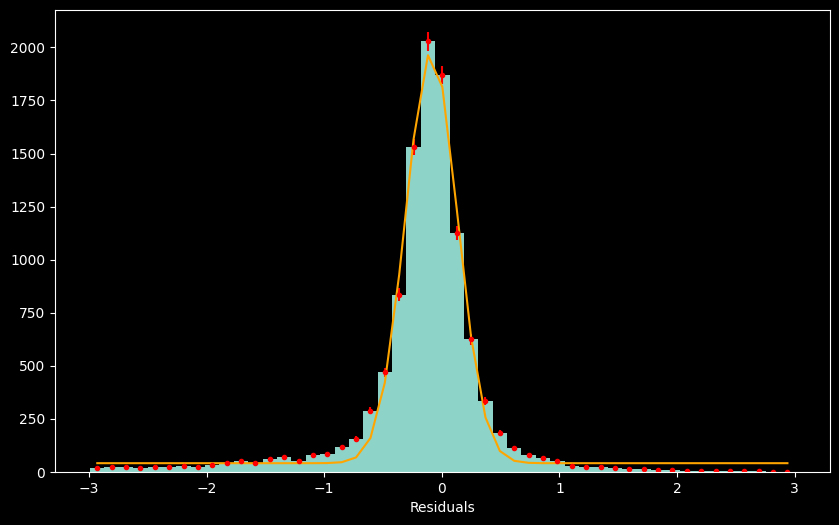

In [152]:
# plotting the histogram for the residuals
fig, ax = plt.subplots(figsize=(10,6))
x = df.loc[(df['residuals'] > -3) & (df['residuals'] < 3)]['residuals']
y = ax.hist(x, bins=np.linspace(x.min(), x.max()))

# Set the appropriate Poisson uncertainty for each bin
poisson_uncer = np.sqrt(np.abs(y[0]))
bins = y[1]
M_bins = (bins[1:]+bins[:-1])/2
ax.errorbar(M_bins, y[0], yerr=poisson_uncer, fmt='.r')

# define an appropriate function and fit it to the histogram of the residuals
def f(x, mu, sigma, A, B):
    return A * stats.norm.pdf(x, mu, sigma) + B

popt, pcov = optimize.curve_fit(f, M_bins, y[0])

ax.plot(M_bins, f(M_bins, *popt), color='orange')
ax.set_xlabel('Residuals')

In [158]:
# Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?
SSR = np.sum((y[0] - f(M_bins, *popt))**2)
TSS = np.sum((np.mean(y[0]) - y[0])**2)
R_2 = 1 - SSR/TSS

print("R2 =", R_2, "\nR =", np.sqrt(R_2))

# set the number of degrees of freedom
ndof = len(y[0]) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
sigma_y = np.sqrt(np.abs(y[0]))
chi2 = np.sum(((y[0] - f(M_bins, *popt))**2) / sigma_y)
print("chi2 =", chi2)

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

R2 = 0.9900179261264936 
R = 0.9949964452833455
n degrees of freedom = 48
chi2 = 14822.04611439832
p-value = 0.0


the p-value is < 0.05, so the fit is considered unsatisfactory

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [82]:
# Load the data
url = "https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt?dl=1"
webURL = urllib.request.urlopen(url)
df1 = pd.read_csv(webURL, names=['Time','Temperature'], delimiter=" ")
# selecting the samples which have time between 2008 to 2012
df2 = df1.loc[df1['Time'].between(2008, 2012, inclusive='both')].copy()
df2.head()

,Time,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444



Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 12.33 +- 0.02
c = 9.4 +- 0.1 

Average temperature from the fit function parameters: c = 9.38411486809072 C˚
Minimum temperature from the fit function parameters: c-a = 19.372248557225234 C˚
Maximum temperature from the fit function parameters: c+a = -0.6040188210437964 C˚

Minimum temperature from the minimization of the fit function: -0.6040188210437964 C˚
Maximum temperature from the maximization of the fit function: 19.37224855722517 C˚


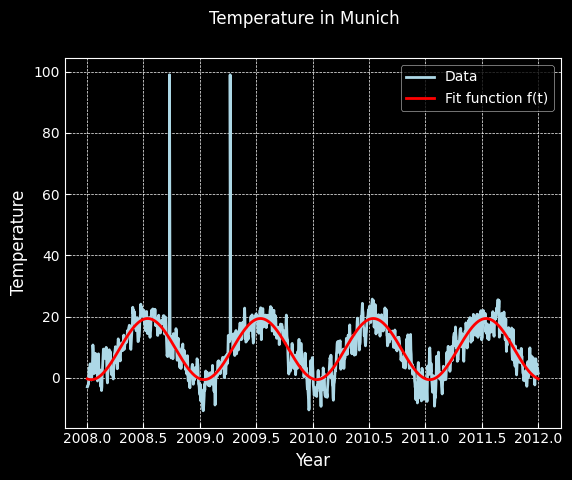

In [83]:
plt.style.use('dark_background')
# Define the fit function f(t)
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Use curve_fit to find the best-fit parameters
popt_f, pcov_f = optimize.curve_fit(f, df2['Time'],df2['Temperature'])

# Print of the best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_f[0], np.sqrt(pcov_f[0,0])))
print("b = %.2f +- %.2f" % (popt_f[1], np.sqrt(pcov_f[1,1])))
print("c = %.1f +- %.1f" % (popt_f[2], np.sqrt(pcov_f[2,2])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, f(t_range,*popt_f), c='red', label='Fit function f(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='best')

print('Average temperature from the fit function parameters: c =', popt_f[2],'C˚')
print('Minimum temperature from the fit function parameters: c-a =', popt_f[2]-popt_f[0],'C˚')
print('Maximum temperature from the fit function parameters: c+a =', popt_f[2]+popt_f[0],'C˚')

temp_min = optimize.minimize_scalar(lambda t: f(t, popt_f[0], popt_f[1], popt_f[2]))
temp_max = optimize.minimize_scalar(lambda t: -f(t, popt_f[0], popt_f[1], popt_f[2]))

print('\nMinimum temperature from the minimization of the fit function:', temp_min['fun'],'C˚')
print('Maximum temperature from the maximization of the fit function:', -1*temp_max['fun'],'C˚')

The variable "b" is the phase offset of the function. It represents the amount by which the function is shifted along the x-axis. This value can be positive or negative and determines the location of the function relative to the y-axis. It can also be thought of as the starting point of the function along the x-axis. The unit of "b" is radians.</br>
The variable "b" would not have a direct physical meaning. It represents a phase offset, or a shift along the x-axis, which does not have a direct correlation to temperature. However, it could be used to model a scenario where the temperature is affected by an external factor that causes it to shift in time, such as the rotation of the Earth relative to the sun (day and night cycles). In this case, the value of c could be used to represent the phase shift caused by this external factor.


Parameters from the fit function f(t):
a = -10.0 +- 0.2
b = 1.001 +- 0.003
c = -6 +- 32
d = 9.4 +- 0.1 



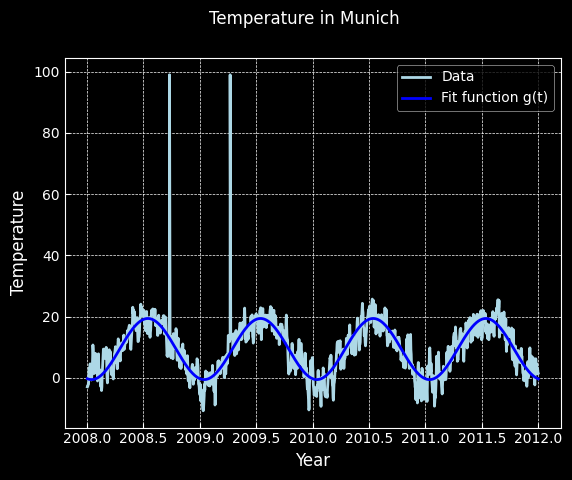

In [84]:
# g(t)
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

# curve_fit for finding the best-fit parameters
popt_g, pcov_g = optimize.curve_fit(g, df2['Time'],df2['Temperature'])

# Best-fit parameters
print('\nParameters from the fit function f(t):')
print("a = %.1f +- %.1f" % (popt_g[0], np.sqrt(pcov_g[0,0])))
print("b = %.3f +- %.3f" % (popt_g[1], np.sqrt(pcov_g[1,1])))
print("c = %.0f +- %.0f" % (popt_g[2], np.sqrt(pcov_g[2,2])))
print("d = %.1f +- %.1f" % (popt_g[3], np.sqrt(pcov_g[3,3])),'\n')

# Plot the data and the best-fit model
t_range = np.linspace(df2['Time'].min(),df2['Time'].max(),1500) 
fig = plt.figure()
fig.suptitle('Temperature in Munich')
plt.plot(df2['Time'], df2['Temperature'], c='lightblue', label='Data')
plt.plot(t_range, g(t_range,*popt_g), c='blue', label='Fit function g(t)',)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='best')

In [85]:
# define α
α = 0.05

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < α else "NO")
    return pval

# RRS calculation
ssr_f = np.sum((df2['Temperature'] - f(df2['Time'],*popt_f))**2)
ssr_g = np.sum((df2['Temperature'] - g(df2['Time'],*popt_g))**2)
print('RSS of the fit f(t) =', ssr_f)
print('RSS of the fit g(t) =', ssr_g,'\n')

# run F-test: f(t) vs g(t)
ndof_f = 2
ndof_g = 3
N = len(df2['Temperature'])
print('F-test f(t) vs g(t):')
cl_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)

RSS of the fit f(t) = 34359.85859996652
RSS of the fit g(t) = 34352.79405393762 

F-test f(t) vs g(t):
p-value: 0.584 , additional parameter necessary: NO
